### Import Libraries

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)
import pprint
from matplotlib import pyplot as plt
from sklearn.utils import resample
from model_scoring import scoring

### Import Scaler

In [3]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

In [4]:
data = pd.read_csv('cleaned_data.csv')

X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

### Oversampling

In [5]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.25, random_state=42)

In [6]:
X_train_scaled = scaler.fit(X)
X_train_norm = pd.DataFrame(X_train_scaled.transform(X), columns=X.columns)

train = pd.concat([X_train_norm, y], axis=1)

In [7]:
#  Oversampling

yes_bankrupt = train[train['Bankrupt?']==1]
no_bankrupt = train[train['Bankrupt?']==0]

yes_bankrupt_oversampled = resample(
    yes_bankrupt,
    replace=True,
    n_samples=len(no_bankrupt),
    random_state=0,
)

train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0).dropna()

In [8]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop(['Bankrupt?'], axis=1).copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over, test_size=.25, random_state=42)

### Train & Test Model

In [10]:
clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = clf.predict(X_test)

## SCORING

In [12]:
from model_scoring import scoring

'The accuracy score of the model is: 0.7948484848484848 '
'The precision score of the model is: 0.7379172894867962 '
'The recall score of the model is: 0.9074754901960784 '
'The ROC AUC score of the model is: 0.7960638841867682 '


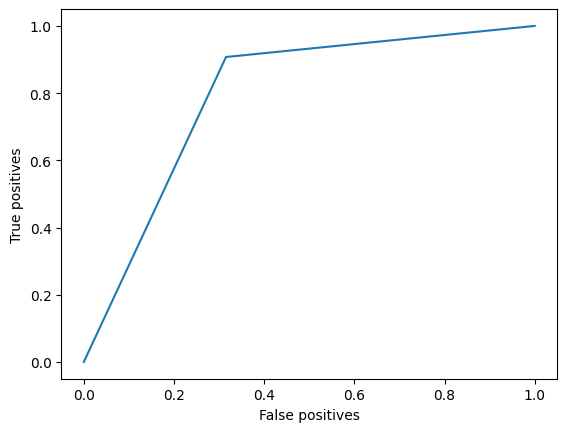

In [13]:
scoring(y_test, y_pred)

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.05205279, 0.94501466, 0.0659824 , 0.08431085, 0.05796038])

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing' : [ .0000001 , .00001, .0001, .001, .01, .1] }

grid_search_cv = GridSearchCV( clf, param_grid = param_grid, cv=3) 

In [32]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(var_smoothing=0.001),
             param_grid={'var_smoothing': [1e-07, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1]})

In [33]:
grid_search_cv.best_score_

0.7949077314521388

In [34]:
grid_search_cv.best_params_

{'var_smoothing': 1e-05}

### Refit model according to Grid Search

In [36]:
clf = GaussianNB(var_smoothing=.00001)

clf.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [37]:
y_pred = clf.predict(X_test)

'The accuracy score of the model is: 0.84 '
'The precision score of the model is: 0.8357664233576643 '
'The recall score of the model is: 0.8419117647058824 '
'The ROC AUC score of the model is: 0.84002063055438 '


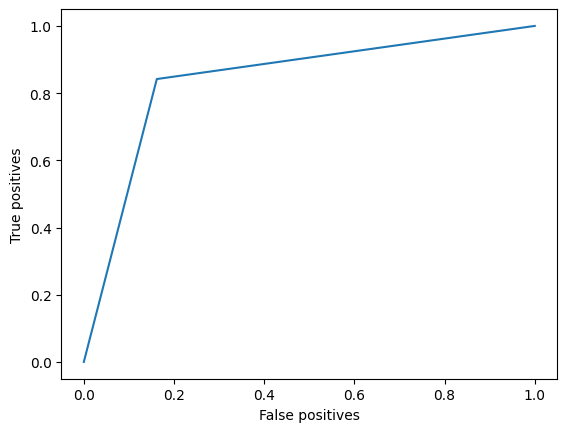

In [38]:
scoring(y_test, y_pred)

After using Gridsearch's parameter recommendation, we notice that the overall scores are more even, but compared to the unparametered GaussianNB model we lose in recall.